<a href="https://colab.research.google.com/github/Gianca-DLRA/Shapefiles/blob/main/tareas/tarea_Giancarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas 
!pip install geopy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 59.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Estas son las librerias que vas a usar
import geopandas as gpd
import matplotlib.pyplot as plt
from mapclassify import classify
import pandas as pd
import numpy as np
import folium
import geopy

1. Crea un mapa para visualizar el archivo:
https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson

<Axes: >

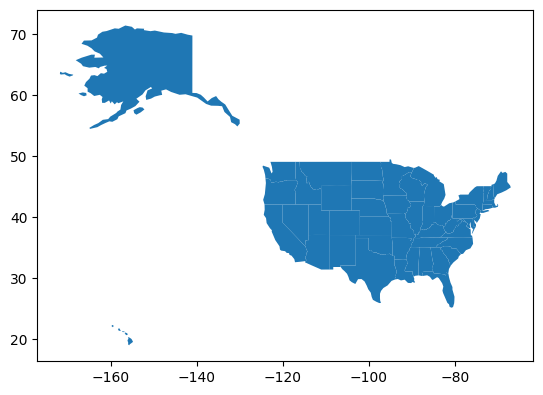

In [4]:
# tu codigo aqui
url="https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
df=gpd.read_file(url)
df.plot()

2. Obtener toda la información sobre el dataframe.

In [5]:
# tu codigo aqui
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scalerank     51 non-null     int64   
 1   adm1_code     51 non-null     object  
 2   diss_me       51 non-null     int64   
 3   adm1_cod_1    51 non-null     object  
 4   iso_3166_2    51 non-null     object  
 5   wikipedia     51 non-null     object  
 6   sr_sov_a3     51 non-null     object  
 7   sr_adm0_a3    51 non-null     object  
 8   iso_a2        51 non-null     object  
 9   adm0_sr       51 non-null     int64   
 10  admin0_lab    51 non-null     int64   
 11  name          51 non-null     object  
 12  name_alt      51 non-null     object  
 13  name_local    0 non-null      float64 
 14  type          51 non-null     object  
 15  type_en       51 non-null     object  
 16  code_local    51 non-null     object  
 17  code_hasc     51 non-null     object  
 18  note

3. Obtener estadísticas descriptivas de las columnas del dataframe

In [6]:
# tu codigo aqui
serie=df.dtypes
cols=[]
for col in serie.index:
  if serie[col] =='int64' or serie[col]=='float':
    cols.append(col)

for col in cols:
  print(df[col].describe())

count    51.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: scalerank, dtype: float64
count      51.000000
mean     3538.000000
std        14.866069
min      3513.000000
25%      3525.500000
50%      3538.000000
75%      3550.500000
max      3563.000000
Name: diss_me, dtype: float64
count    51.000000
mean      2.627451
std       2.332044
min       1.000000
25%       1.000000
50%       1.000000
75%       5.000000
max       8.000000
Name: adm0_sr, dtype: float64
count    51.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: admin0_lab, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: name_local, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: note, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      Na

4. ¿Cuántos estados están representados en el archivo?

In [7]:
# tu codigo aqui
print(len(df['iso_3166_2']))

51


5.  ¿Cuáles son los nombres de los tres países con mayor superficie?

In [9]:
# tu codigo aqui
df_sorted=df.sort_values(by='area_sqkm', ascending=False)
top3=df_sorted.head(3)
for st in top3['name']:
  print(st)

Minnesota
Tennessee
Alabama


6. Crea un mapa coroplético para visualizar la clasificación anterior

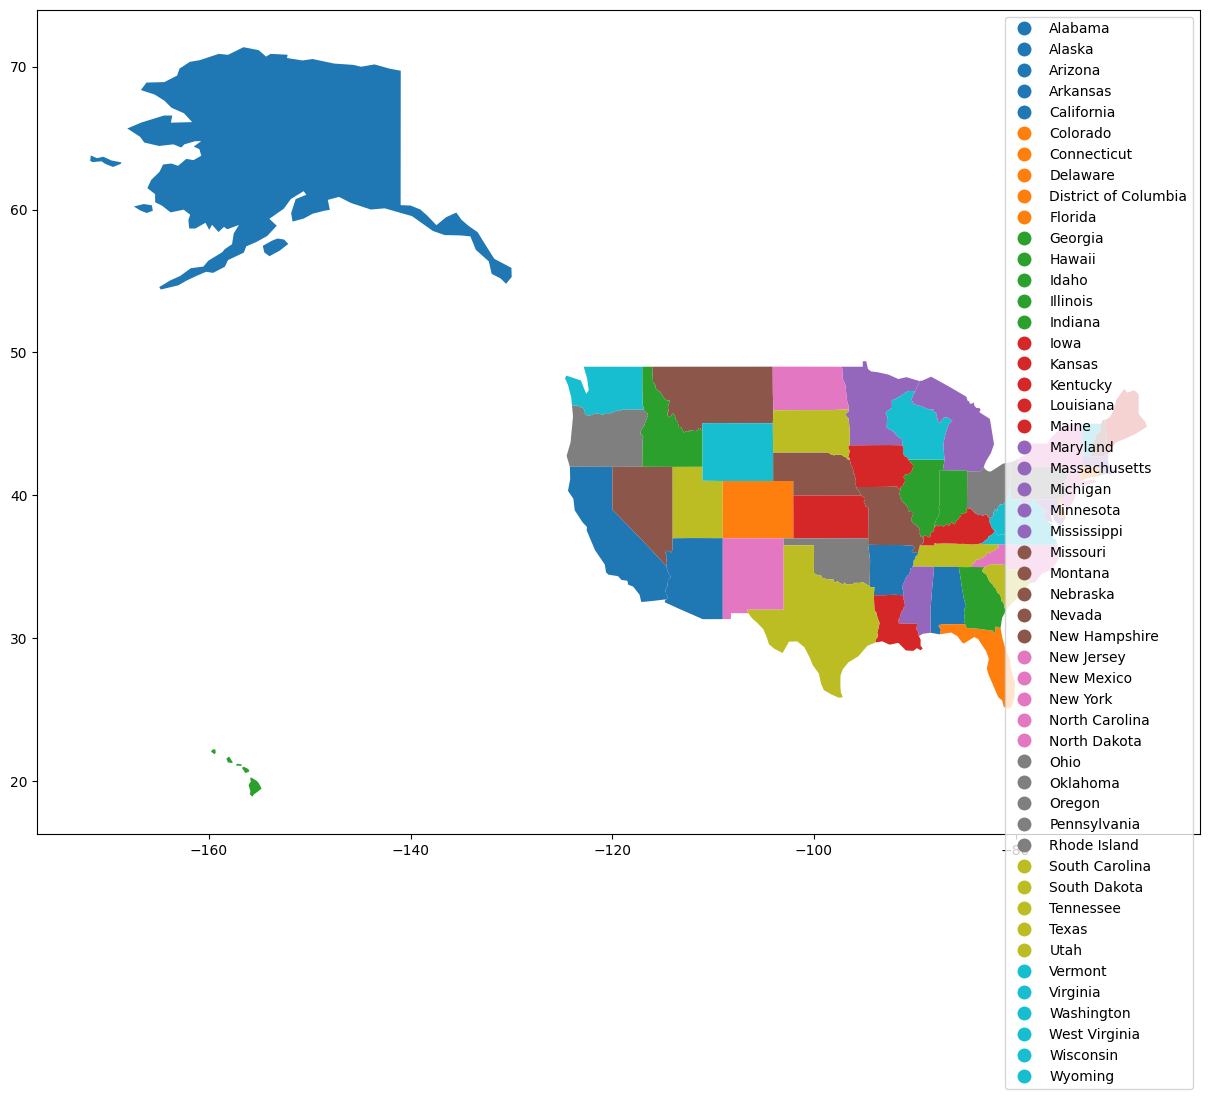

In [11]:
# tu codigo aqui
fig, ax= plt.subplots(1, figsize=(15,11))
df_sorted.plot(column='name', categorical=True, legend=True, ax=ax)
plt.show()

6. Crea un mapa interactivo para visualizar los estados/provincias con los nombres de las entidades

In [13]:
# tu codigo aqui
df.explore(column='name')